# <u>Time Series Analysis</u>

<h2><i>Use the “employment.csv” data set and perform time series analysis and visualization through the 
    following questions. </i></h2>

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

<h3><i>2. Convert datestamp column to a datetime object and Set the datestamp columns as the index of 
your DataFrame. Check if there are missing values in each column.
</i></h3>

In [4]:
df = pd.read_csv("employment.csv",parse_dates=True,index_col = "datestamp")
df.isnull().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

<h3><i>3. Generate a boxplot to find the distribution of unemployment rate for every industry .
    </i></h3>

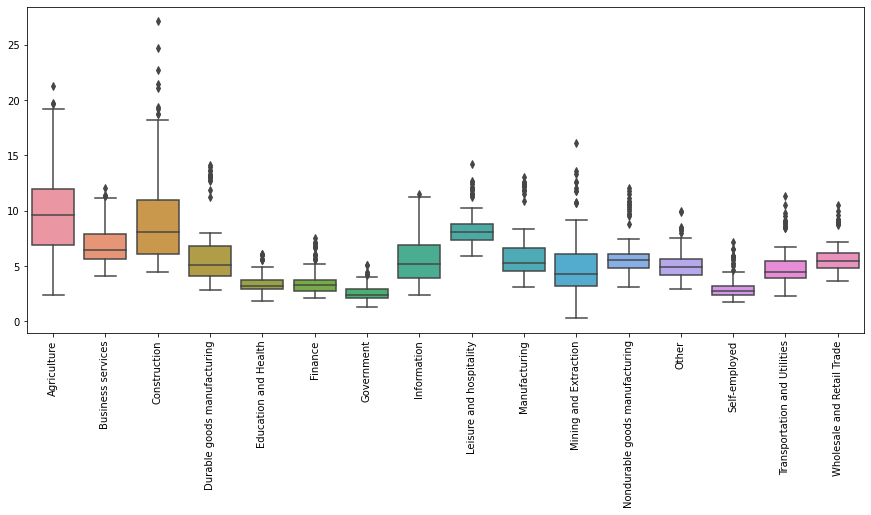

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=90)
sns.boxplot(data=df, ax=ax)
plt.show()

In [ ]:
# Remove outliers (optional)
median = df.median()
std = df.std()
outliers = (df- median).abs() > std
df[outliers] = np.nan
df.fillna(median, inplace=True)
plt.figure(figsize=(15,10))
df.boxplot(rot=90)
plt.show()

<h3><i>4. Using line chart Visualize the unemployment rate of workers by industry .
</i></h3>

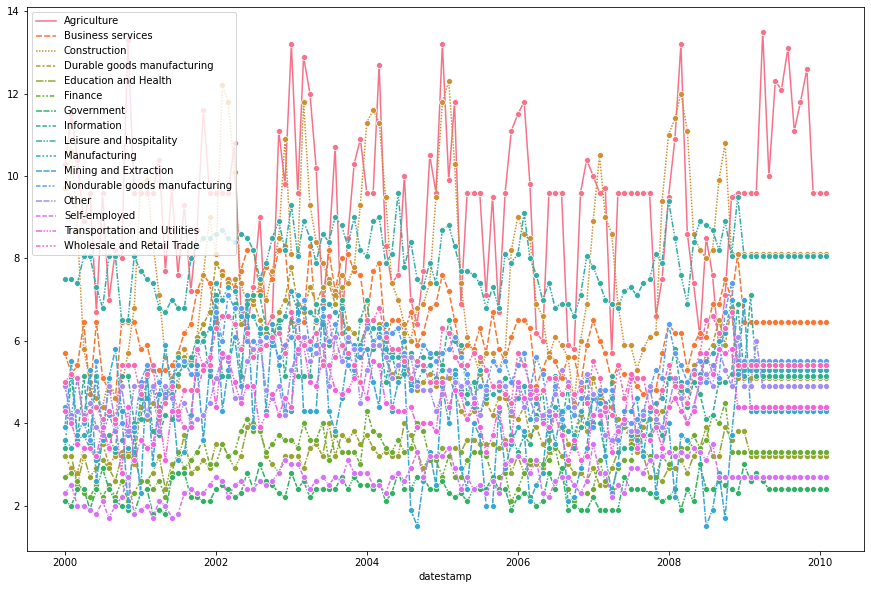

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df,marker='o')
plt.show()

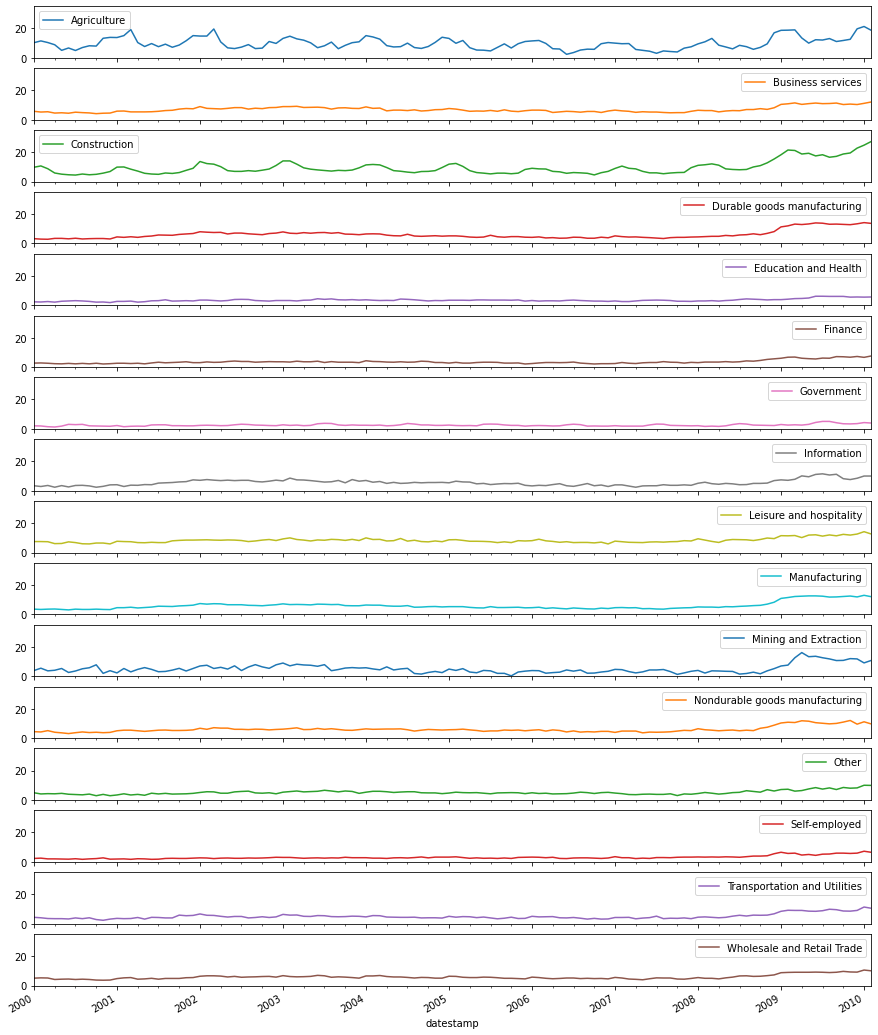

In [9]:
df.plot(subplots = True,figsize=(15,20),ylim=(0,35))
plt.show()

<h3><i>5. Plot the monthly and yearly trends .</i></h3>

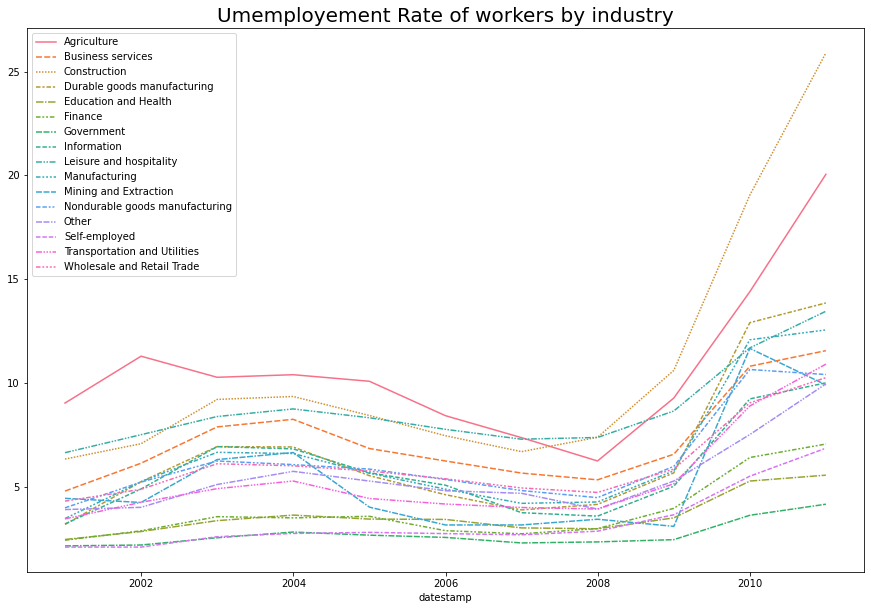

In [10]:
# Yearly Trend
df_year = df.resample("Y").mean()
plt.figure(figsize=(15,10))
plt.title("Umemployement Rate of workers by industry",fontsize=20)
sns.lineplot(data=df_year)
plt.show()

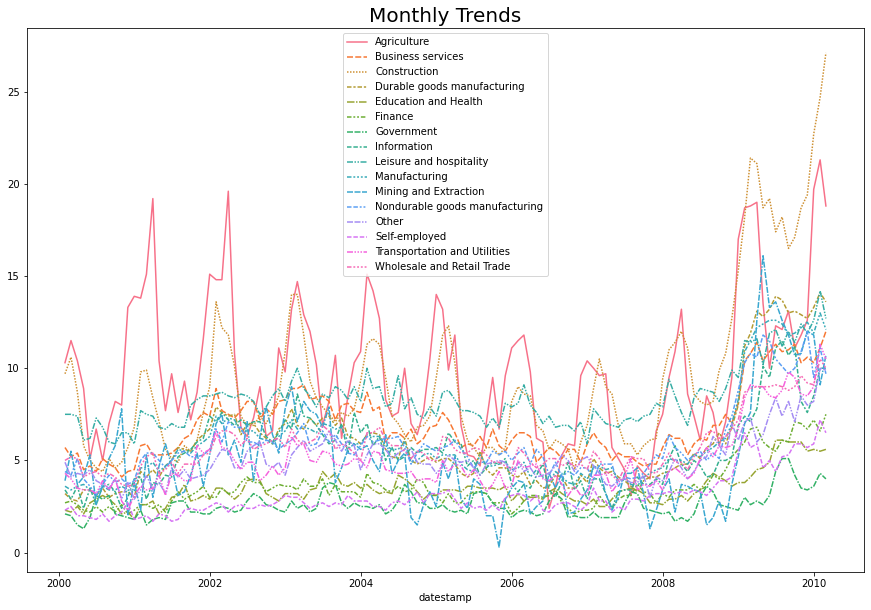

In [40]:
# Monthly Trend
df_month = df.resample("M").mean()
plt.figure(figsize=(15,10))
plt.title("Monthly Trends",fontsize=20)
sns.lineplot(data=df_month)
plt.show()

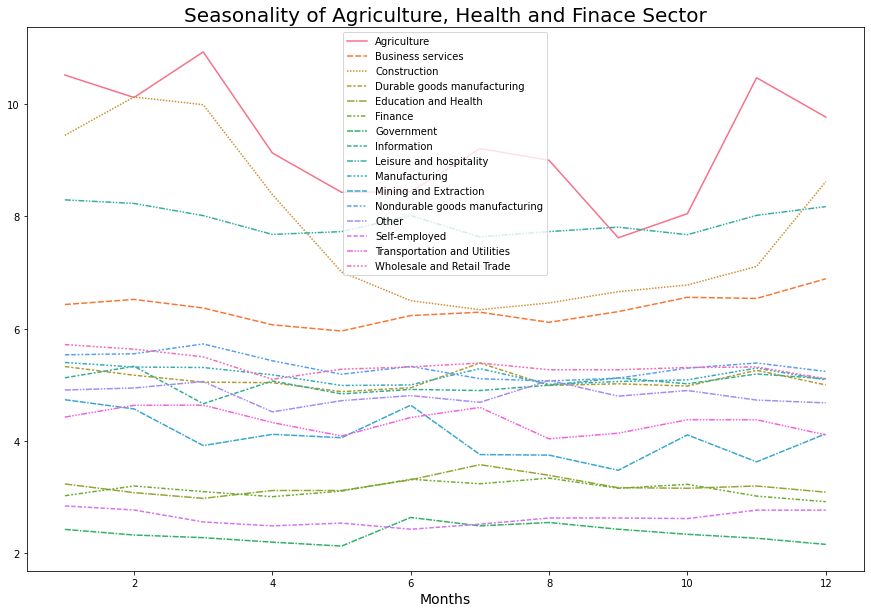

In [ ]:
# Monthly Growth
df_mon = df.groupby(df.index.month).mean()
plt.figure(figsize=(15,10))
plt.title("Seasonality of Agriculture, Health and Finace Sector",fontsize=20)
plt.xlabel("Months",fontsize=14)
sns.lineplot(data=df_mon)
plt.show()

<h3><i>6. Apply time series decomposition to your dataset to visualize the trend and seasonality .</i></h3>

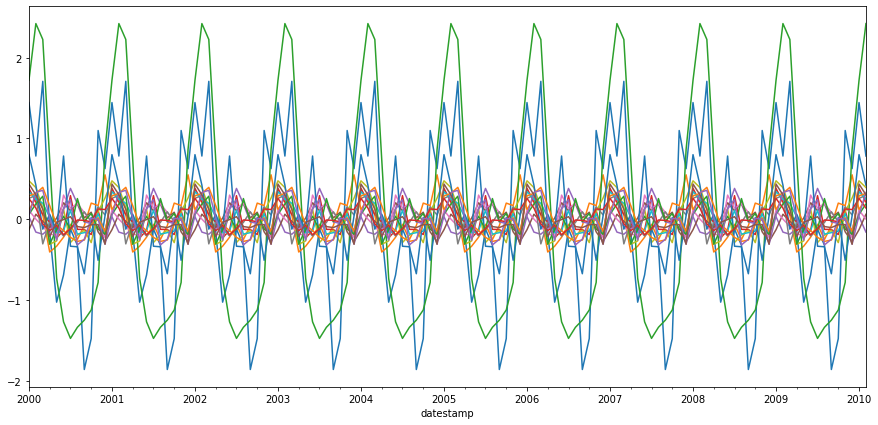

In [ ]:
from pylab import rcParams
df_year = df.resample("Y").mean()
#df_year.reset_index(inplace=True)
#df_year["datestamp"].astype(float)
rcParams['figure.figsize'] = 15,7
for i in df.columns:
    result=seasonal_decompose(df[i],  model='Additive')
    result.seasonal.plot()

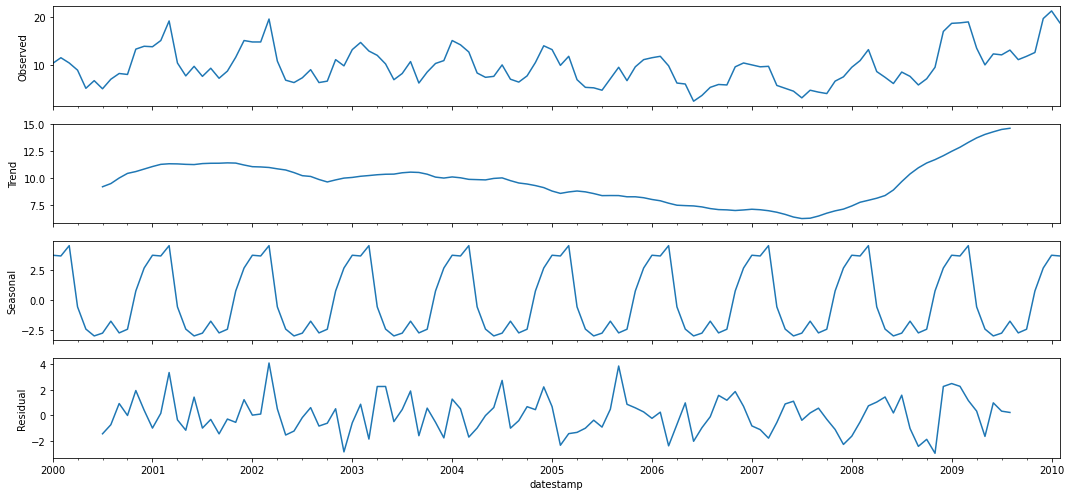

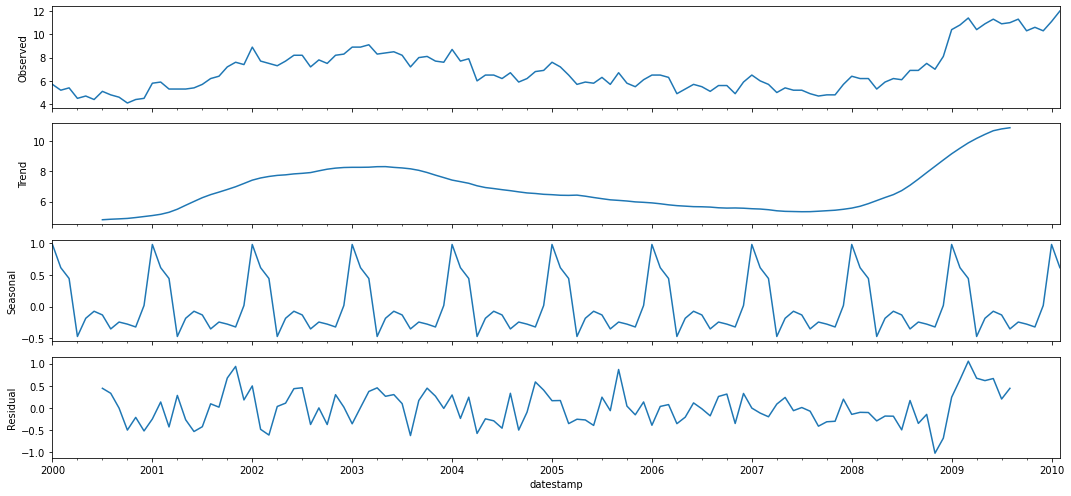

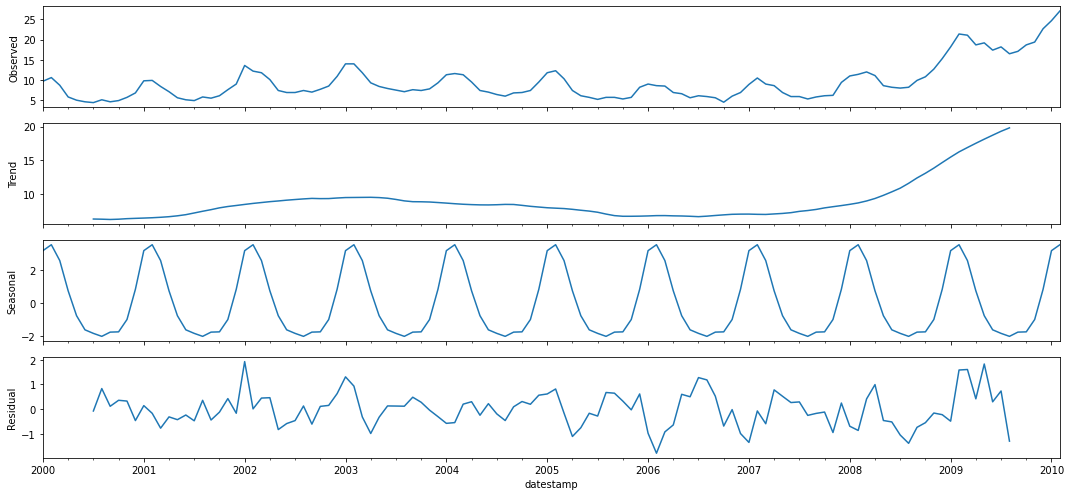

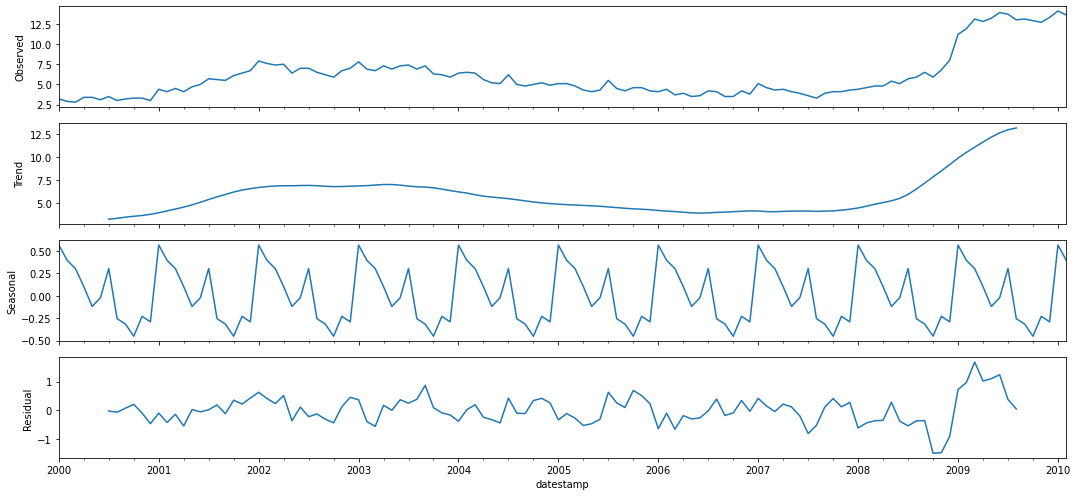

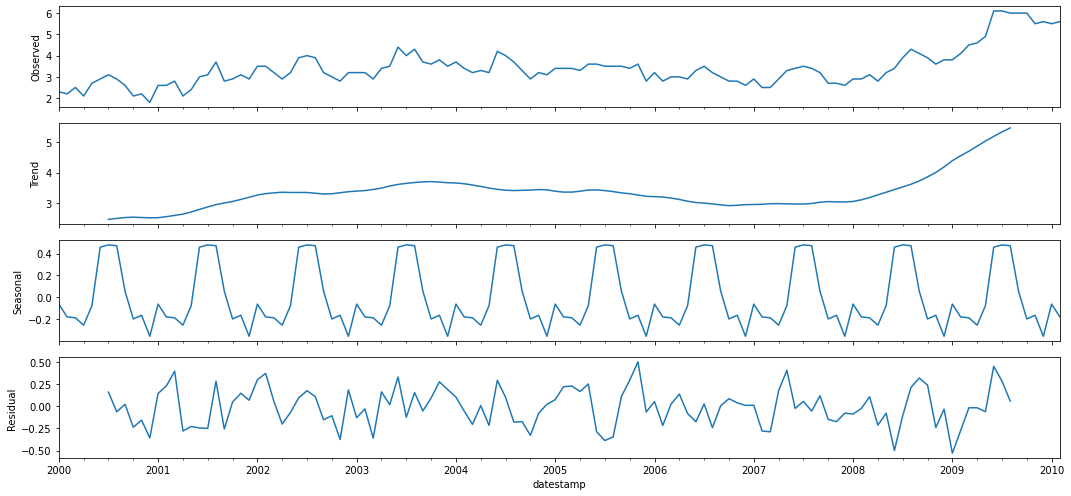

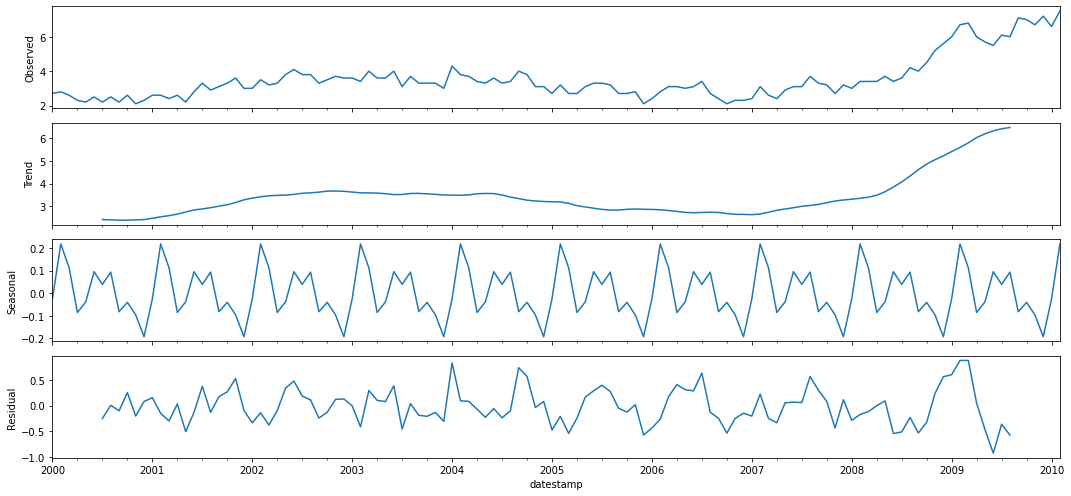

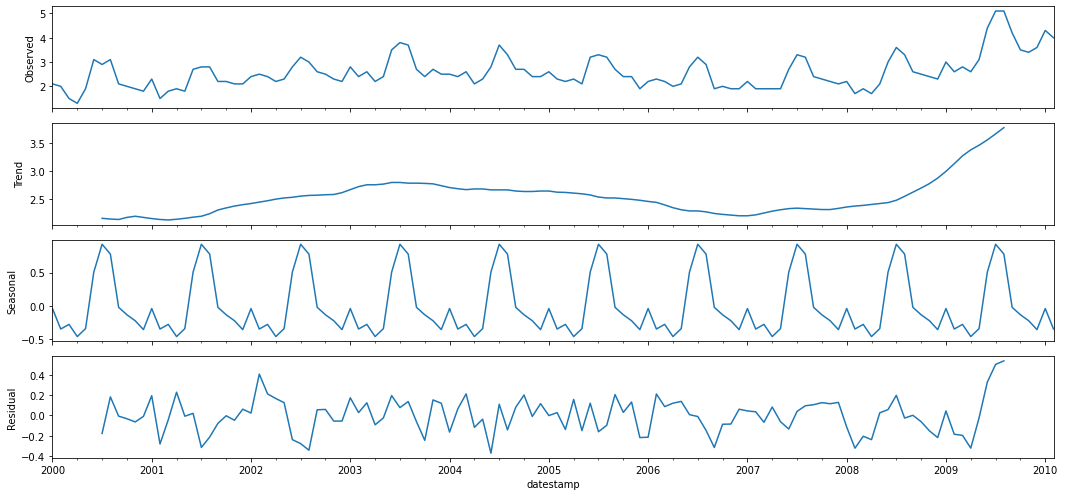

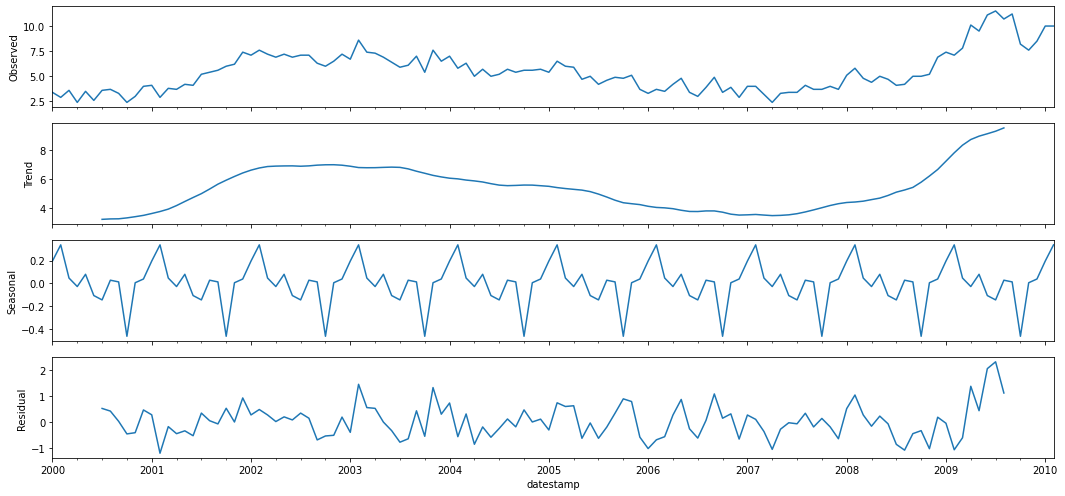

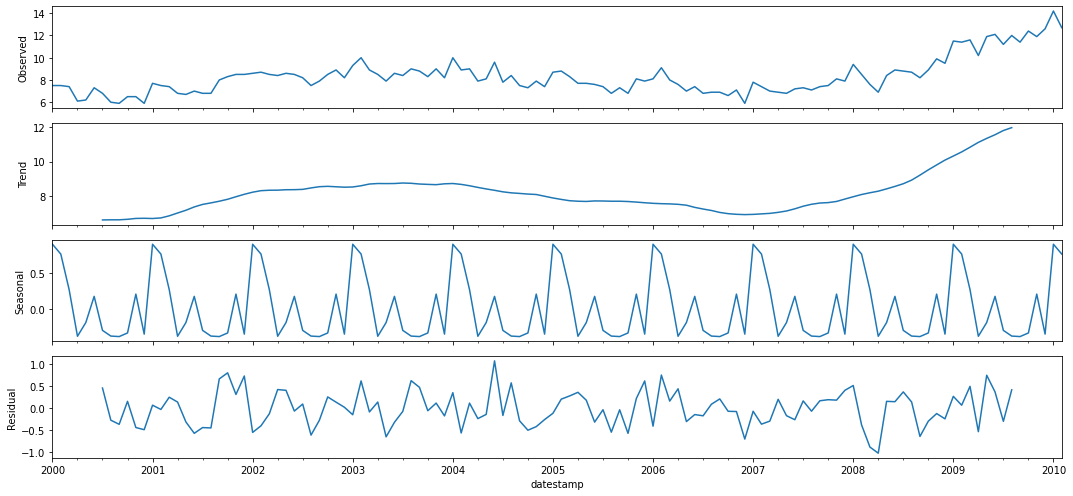

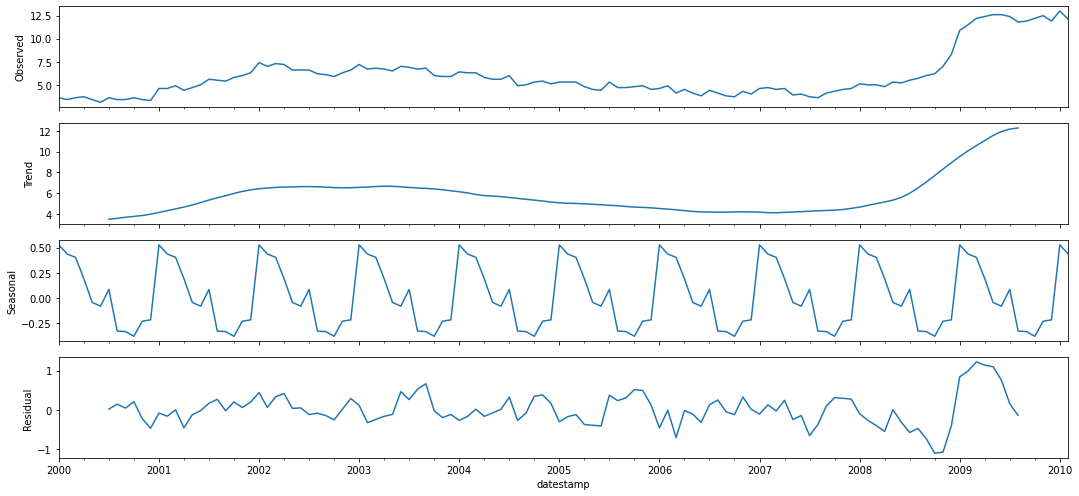

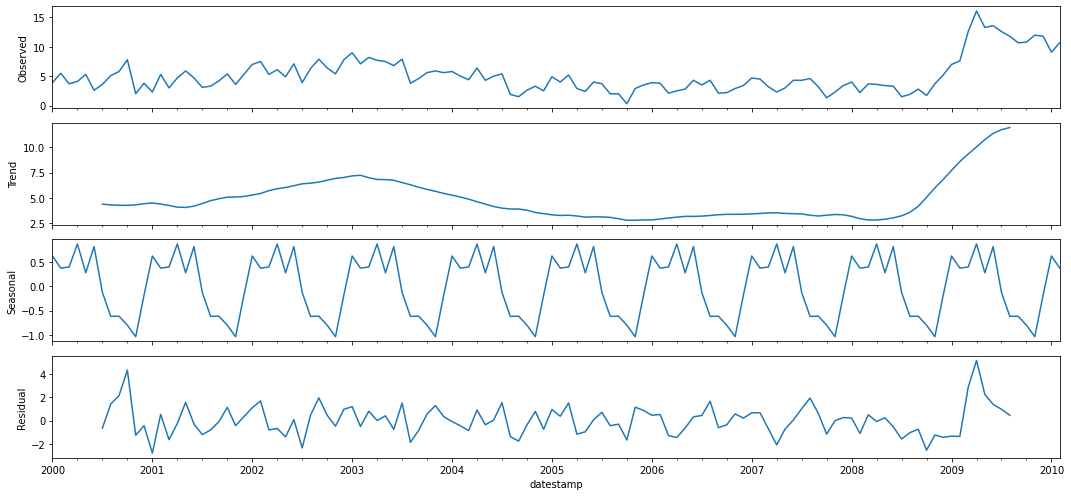

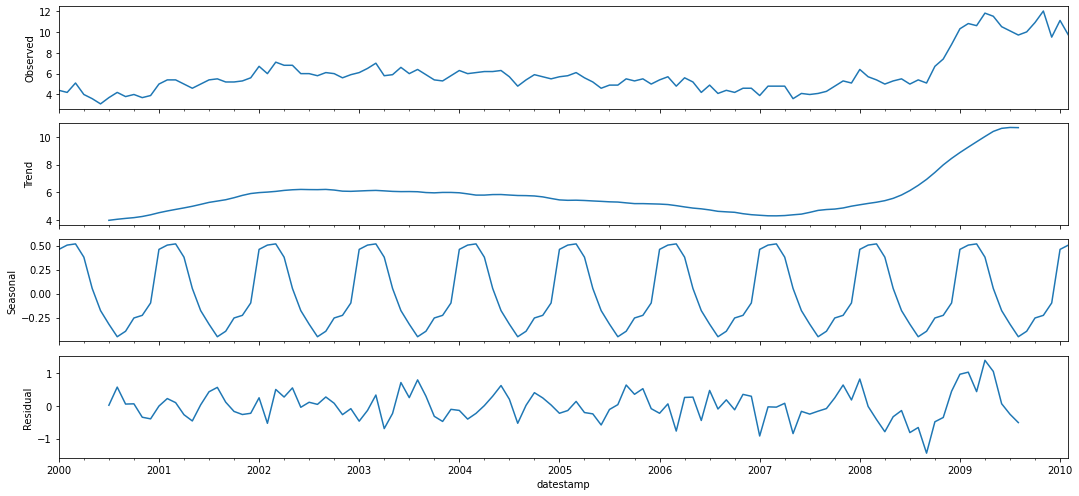

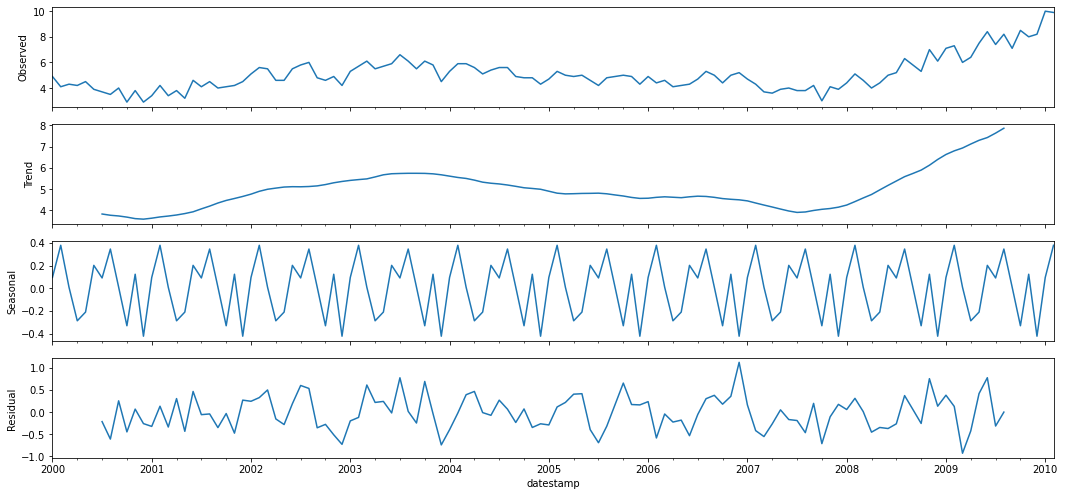

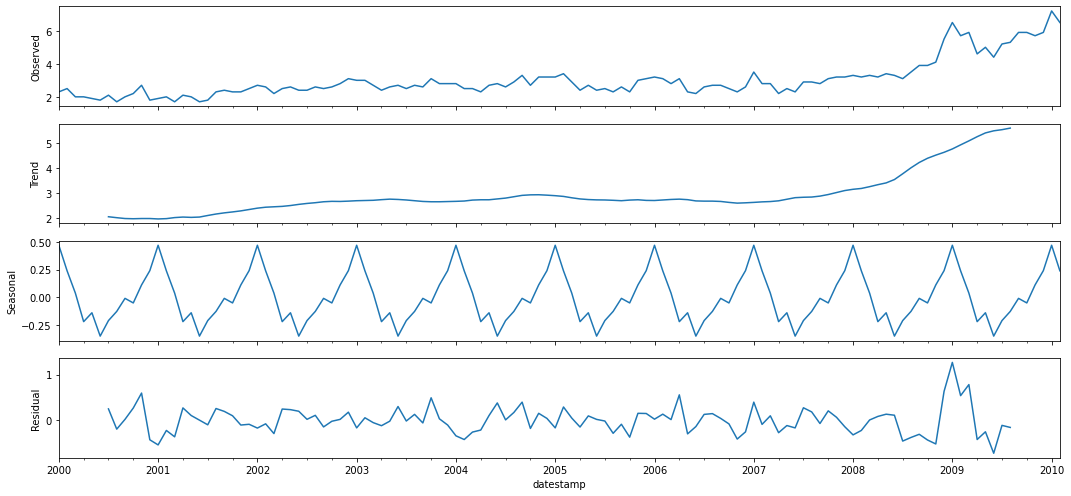

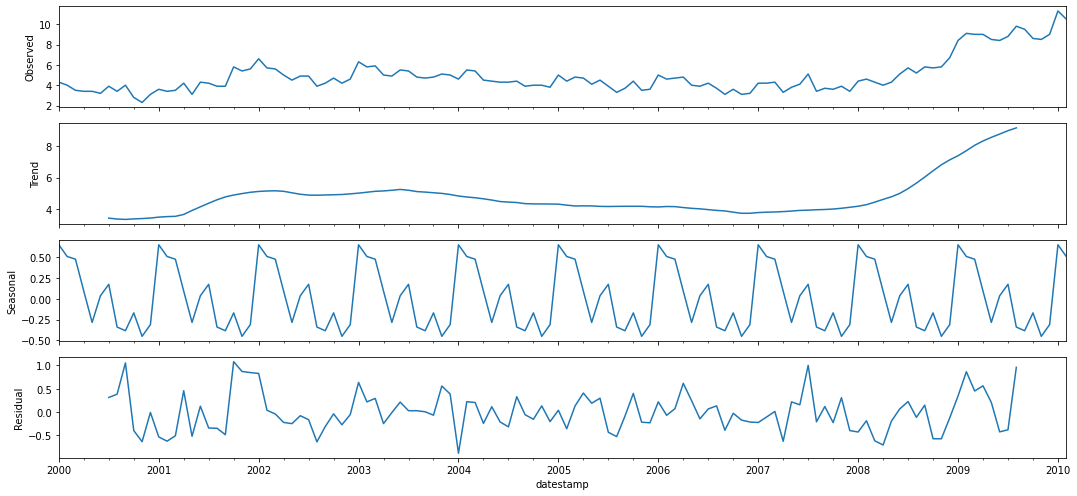

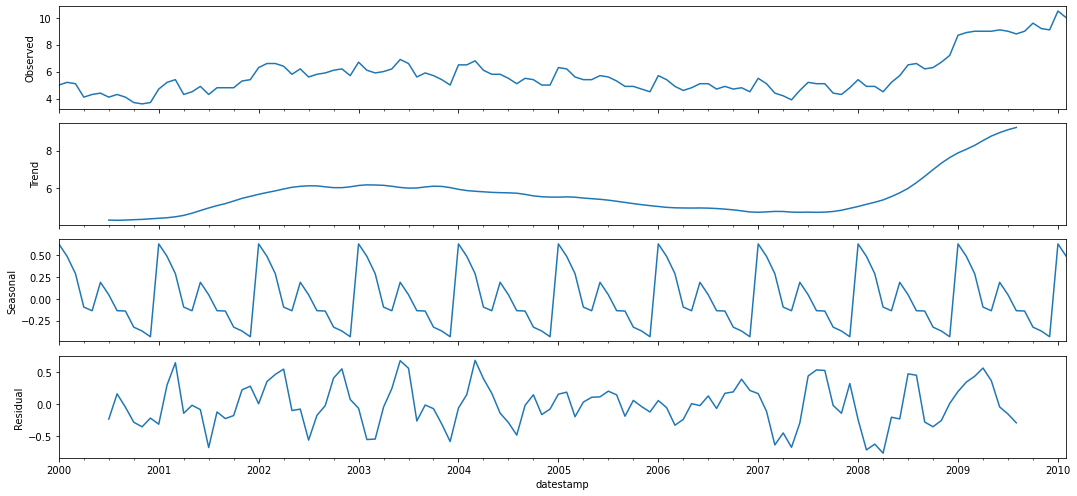

In [14]:
from pylab import rcParams
df_year = df.resample("Y").mean()
rcParams['figure.figsize'] = 15,7
for i in df.columns:
    result=seasonal_decompose(df[i],  model='Additive')
    result.plot()

<h3><i>7. Visualize the seasonality of Agriculture, Health and Finance sector.</i></h3>

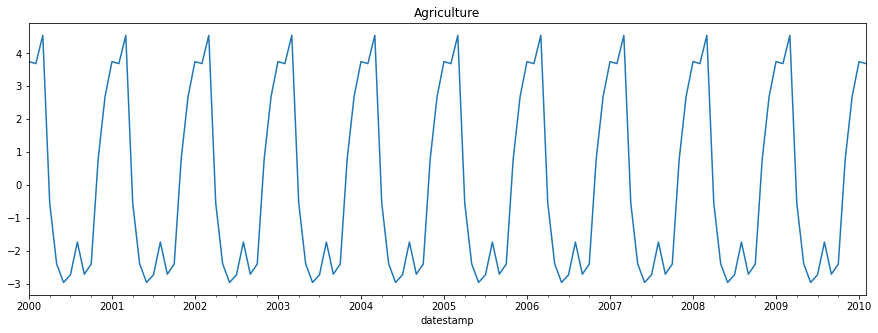

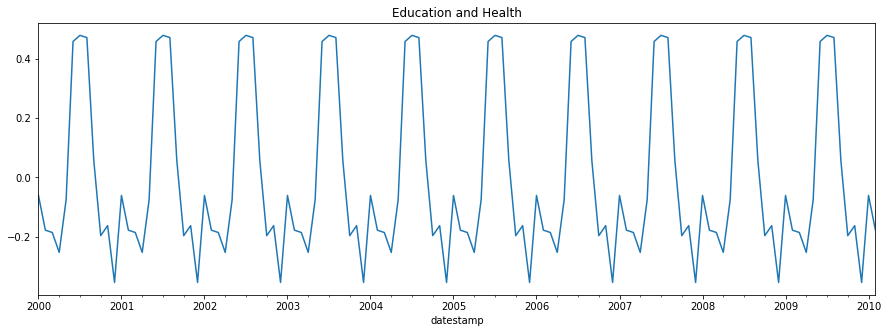

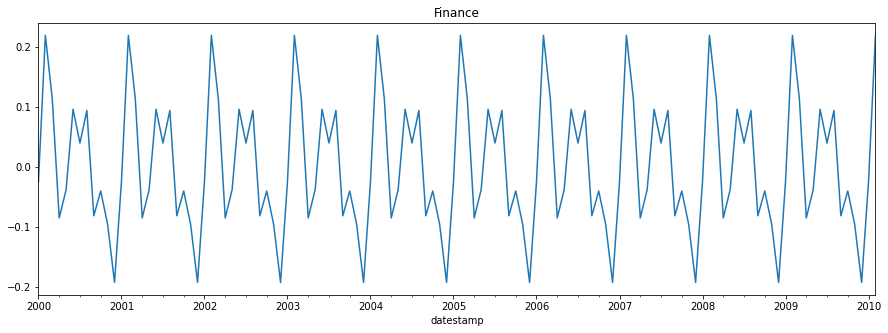

In [23]:
df_year = df.resample("Y").mean()
df_month = df.resample("M").mean()

decomp = seasonal_decompose(df_month['Agriculture'], model='Additive').seasonal
decomp.plot(figsize=(15,5),title="Agriculture")
plt.show()

decomp = seasonal_decompose(df_month['Education and Health'], model='Additive').seasonal
fig = decomp.plot(figsize=(15,5),title="Education and Health")
plt.show()

decomp = seasonal_decompose(df_month['Finance'], model='Additive').seasonal
fig = decomp.plot(figsize=(15,5),title="Finance")
plt.show()

<h3><i>8. Visualize the seasonality of multiple time series and the correlation between each time series 
in the dataset.
</i></h3>

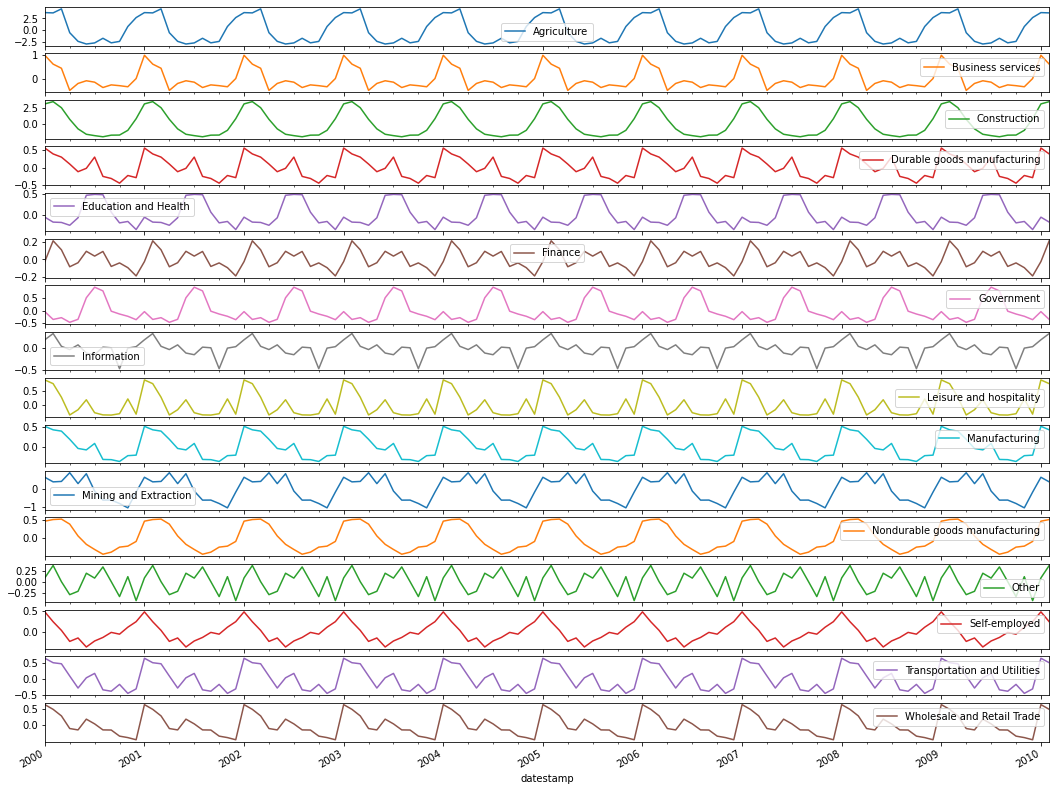

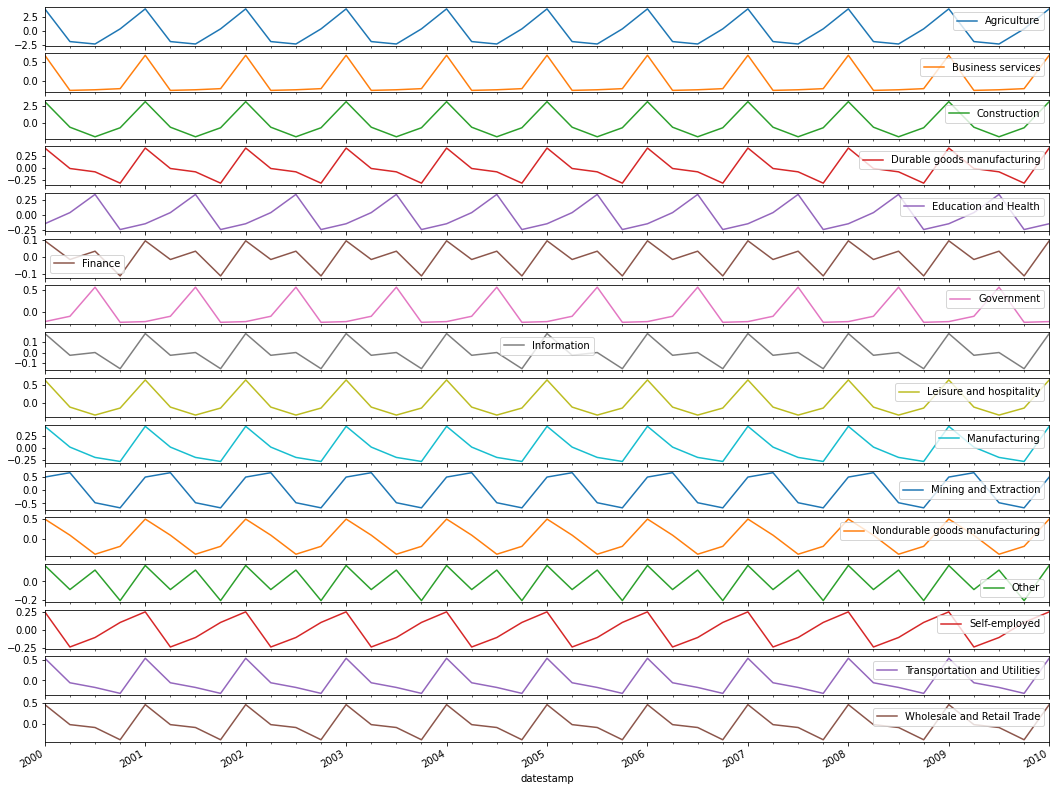

In [37]:
df_month = df.resample("M").mean()
df_quar = df.resample("Q").mean()
decomp1 = seasonal_decompose(df_month, model='Additive').seasonal
decomp2 = seasonal_decompose(df_quar, model='Additive').seasonal
fig1 = decomp1.plot(subplots=True,figsize=(18,15))
fig2 = decomp2.plot(subplots=True,figsize=(18,15))
plt.show()

In [24]:
df_month = df.resample("M").mean()
df_quar = df.resample("Q").mean()
data = df_month.corrwith(df_quar)
data

Agriculture                       0.910681
Business services                 0.985983
Construction                      0.965552
Durable goods manufacturing       0.992962
Education and Health              0.936309
Finance                           0.980571
Government                        0.701258
Information                       0.972705
Leisure and hospitality           0.962135
Manufacturing                     0.993166
Mining and Extraction             0.929064
Nondurable goods manufacturing    0.971379
Other                             0.932799
Self-employed                     0.972912
Transportation and Utilities      0.985663
Wholesale and Retail Trade        0.978958
dtype: float64

In [26]:
df_month = df.resample("M").mean()
df_year = df.resample("Y").mean()
data = df_month.corrwith(df_year)
data

Agriculture                       0.767538
Business services                 0.913487
Construction                      0.968249
Durable goods manufacturing       0.942339
Education and Health              0.963299
Finance                           0.925383
Government                        0.945977
Information                       0.794842
Leisure and hospitality           0.913409
Manufacturing                     0.923757
Mining and Extraction             0.915307
Nondurable goods manufacturing    0.828249
Other                             0.838030
Self-employed                     0.910828
Transportation and Utilities      0.901943
Wholesale and Retail Trade        0.886807
dtype: float64